In [1]:
# library = 함수를 모아둔 집합체, 사전

import pandas as pd # 데이터 표현 타입 Series 
#인덱스를 갖은 벡터 모형이라고 볼 수 있고, 기본적으로 이름을 갖지 않음
# 기본적으로 data, index, dtype(data type), name(column name) 설정이 가능하다
# 숫자테이블을 시계열 조작이 가능한 구조와 연산을 제공

import numpy as np # 데이터 프레임 형태를 지원
import re # 정규 표현 처리 확인  문자열의 패턴을 정의하여 정의한 패턴에 맞는 문자열을 찾을 수 있다. 


import matplotlib.pyplot as plt # x,y행렬 시각화 지원

from tqdm.notebook import tqdm # 진행표시 progress bar_ for반복문에서 사용
import pathlib # 파일시스템을 다루는 모듈, 경로를 모듈화

### graph library

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
 # plotly 프로그램에게 무료버전(오프라인)이라는 사용자환경에서 바로 표현할 수 있도록 함, 차트에 주 눈금 표현

import seaborn as sns #  matplotlib와 비슷한 시각화 모듈
sns.set # sns > seaborn을 set(설정)

import statistics # 기초통계


from sklearn import linear_model # 선형회귀
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score #,5 # 손실함수는 정답에 대한 오류를 숫자로 나타내는 것으로 
# 오답에 가까울수록 큰 값 반대로 정답에 가까울수록 작은 값 (평균제곱오차) 
from sklearn.model_selection import train_test_split # 데이터 분할

import tensorflow as tf
# 정점(vertex)=노드(node)=연산와 엣지(edge)=data(데이터(혹은데이터 통로))=스칼라,벡터,행렬로 구성된 그래프
# 차원(랭크)모양을 띄고 구성 원소는 실수형등의 자료형을 가짐
from tensorflow import keras  # tensorflow에서 keras를 사용 (API)
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
# 케라스(Keras)는 주요 고수준 신경망 API 가운데 하나로, 파이썬(Python)으로 작성됐으며 여러 백엔드 신경망 엔진을 지원
# 신경층(neural layer), 비용 함수(cost function), 옵티마이저(optimizer), 초기화 방식(initialization scheme),
# 활성화 함수(activation function), 정규화 방식(regularization scheme) 모두 독립적인 모듈이며 
# 결합을 통해 새로운 모델을 만들 수 있다. 새로운 모듈을 새 클래스와 함수로 간단히 추가할 수 있다. 
# 함수 API에서 먼저 계층을 정의한 다음 모델을 생성하고 컴파일하고 피팅(학습)한다.
print(tf.__version__)



C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


2.4.1


# Data 불러오기

In [2]:
# TLB사에서 제공한 모델별 자료를 전처리한 데이터

# 데이터 불러오기  pd.read_excel()
data_com = pd.read_excel(r"C:\Users\1410s\Desktop\professor\1_end\Data_preprocessing5.xlsx")


## 결측값을 "0"으로 채우기 # 연산에 잡음이 발생할 수 있어서 처리함
data_com = data_com.fillna(0)

In [3]:
# MatlG와 MatlNum은 1:1 대응으로 파악됨. 8가지

### 사전만들기: MatlG를 통해서 MatlNum을 불러오기 위해

dic_glass = {}
keys = data_com["MatlG"].groupby(data_com["MatlNum"]).mean().keys()
values = data_com["MatlG"].groupby(data_com["MatlNum"]).mean().values
for i in range(len(keys)):
    dic_glass[keys[i]] = round(values[i],2)
### 사전만들기: 위랑 반대로 MatlNum을 통해서 MatlG를 불러올때
MatMaker_dic = {}
for i in range(len(data_com)):
    MatMaker_dic[data_com["MatlG"][i]] = data_com["MatlNum"][i]

In [4]:
dic_glass

{0.0: 0.0,
 106.0: 24.4,
 1067.0: 31.0,
 1078.0: 48.0,
 1080.0: 46.8,
 1506.0: 165.0,
 2116.0: 103.8,
 3313.0: 81.4,
 7628.0: 203.4}

In [5]:
MatMaker_dic

{46.8: 1080.0,
 0.0: 0.0,
 203.4: 7628.0,
 81.4: 3313.0,
 48.0: 1078.0,
 103.8: 2116.0,
 165.0: 1506.0,
 31.0: 1067.0,
 24.4: 106.0}

In [6]:
# RD, GD까지 drop 시킴

### 사전 만들었으니 필요 없는 columns 지우기 
data_com = data_com.drop(columns=["RD","GD","MatlNum"])

# Blind testset 만들기

In [7]:
### 사용자함수(def_1): 각 Model 별 하나의 Blind testset(set: 1층~n층) 추출하기

# 상기 주석의 '각 Model'은 TLB사에서 제공한 데이터 가공 실제 값, 행위 자체를 의미함 Model 안에 ㅣayer 별 ST로 * Try함
# Model안에 다층 PCL SET가 여러개임

def extraction_dataset(data_2,number): #하기 cell below랑 같이 보기^^^^^^^^^^^^^^^^^^^^^^^^^
    """
    data_2 = 전체 data 
    number = 추출하려고 하는 model(:1~65)
    """
    ### 전체 data에서 model="number"인 것만 지정
    test_model = data_2[data_2["Model"]==number]
    
    ### 하나의 set를 가져오기 위해서, model에 있는 layer값들을 정렬(1층~...)
    a = list(test_model["LayerNum"].value_counts().sort_index().keys()) # LayerNum은 1층부터~n층 layer set가 여러개씩 있음
    # 한 layer 세트씩 리스트로 구분함
    a_index = [i-1 for i in a] # 엑셀에 표현을 1부터 썼기 때문에 
    ### 뽑아내기
    df_ = test_model.iloc[a_index,:] # iloc _ pandas에서 사용하는 slicing기법 [범위,대상]
    return df_

In [8]:
### model_list = model_1 ~ model_65
model_list = list(data_com["Model"].value_counts().keys())
# 위에서 뽑아낸 정보를 model으로 list화

testset_dic = {}

### test_list:  뽑힌 정보의 index 정보를 저장하기 위해서 이용
###blinde testset으로 뽑힌 데이터는 train 할때 제거해야 하기 때문에,

testset_list = []
for mo in model_list:
    ### 각 model의 testset을 model_(n) 이름의 변수로 저장하기
    """
    사용자함수: extraction_dataset ^^^^^^^^^^^^^여기
    """
    globals () ["model_{}".format(mo)] = extraction_dataset(data_com,mo)
    testset_list.append(globals () ["model_{}".format(mo)])
    testset_dic["model_{}".format(mo)] = globals () ["model_{}".format(mo)]
    
# globals()[""] 코드 의미는, 전역변수를 함수안에서 새로운 변수명으로 호출하는 기능 ["여기"] 변수명

In [9]:
### 결과물
testset_dic

{'model_5':      Model  LayerNum  PP MatlMaker    RC  MatlG    Cu1  CP1    Cu2  CP2  \
 235      5         1   1   EM-370Z  63.0   46.8   8.14   50  14.91   70   
 236      5         2   0   EM-370Z  58.0   48.0  14.91   70  14.91   51   
 237      5         3   1   EM-370Z  57.0  103.8  14.91   51   0.00    0   
 238      5         4   1   EM-370Z  57.0  103.8   0.00    0  15.66   40   
 239      5         5   0   EM-370Z  58.0   48.0  15.66   40  14.17   72   
 240      5         6   1   EM-370Z  63.0   46.8  14.17   72  14.91   43   
 241      5         7   0   EM-370Z  57.0   81.4  14.91   43   0.00    0   
 242      5         8   0   EM-370Z  57.0   81.4   0.00    0  14.91   44   
 243      5         9   1   EM-370Z  63.0   46.8  14.91   44  14.17   72   
 244      5        10   0   EM-370Z  58.0   48.0  14.17   72  14.17   46   
 245      5        11   1   EM-370Z  57.0  103.8  14.17   46   0.00    0   
 246      5        12   1   EM-370Z  57.0  103.8   0.00    0  14.17   48   
 

In [10]:
### 예시: model_1 의 testset 불러오기
testset_dic["model_5"]

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
235,5,1,1,EM-370Z,63.0,46.8,8.14,50,14.91,70,60,68.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,5,2,0,EM-370Z,58.0,48.0,14.91,70,14.91,51,64,60.390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,5,3,1,EM-370Z,57.0,103.8,14.91,51,0.00,0,100,119.285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,5,4,1,EM-370Z,57.0,103.8,0.00,0,15.66,40,100,119.285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,5,5,0,EM-370Z,58.0,48.0,15.66,40,14.17,72,64,59.640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,5,6,1,EM-370Z,63.0,46.8,14.17,72,14.91,43,60,54.920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,5,7,0,EM-370Z,57.0,81.4,14.91,43,0.00,0,100,101.765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,5,8,0,EM-370Z,57.0,81.4,0.00,0,14.91,44,100,101.765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,5,9,1,EM-370Z,63.0,46.8,14.91,44,14.17,72,60,55.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,5,10,0,EM-370Z,58.0,48.0,14.17,72,14.17,46,64,61.880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
drop_index = [] # 위의 testset_list를 전체데이터에서 제거하는 과정
for i in testset_list:
    drop_index.extend(list(i.index))
data_drop = data_com.drop(drop_index).reset_index(drop=True)

### 제거된 데이터 = data_drop: (train)학습에 이용

In [12]:
data_drop.head()

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,1,1,DS7402M,61.0,46.8,8.37,55,14.29,73,60,66.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0,DS7402M,0.0,0.0,14.29,73,15.04,56,75,74.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,1,DS7402M,47.0,203.4,15.04,56,15.04,46,200,196.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,0,DS7402M,0.0,0.0,15.04,46,15.04,75,75,75.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,1,DS7402M,53.0,81.4,15.04,75,15.04,48,90,82.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. CCL 층 예측기 만들기

### 1.1 CCL data preprocessing(데이터 전처리)

In [13]:
### pp = 0 인 데이터만 추출하기
data_cc = data_drop[data_drop["PP"]==0]
data_cc.head()

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,2,0,DS7402M,0.0,0.0,14.29,73,15.04,56,75,74.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,0,DS7402M,0.0,0.0,15.04,46,15.04,75,75,75.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,6,0,DS7402M,0.0,0.0,15.04,48,14.58,48,180,177.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,8,0,DS7402M,0.0,0.0,14.58,75,15.80,50,75,74.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,10,0,DS7402M,0.0,0.0,15.04,60,14.29,73,75,73.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
### 사용자함수(def_2): CCL train을 위하여, data 전처리하기
def make_ccl(data_cc,drop_list):
    """
    data_cc: 기존데이터
    drop_list: 기존데이터에서 제거하고 싶은 columns 이름
    """
    #.drop을 실제로 수행하는 코드, columns 으로 호출해서 제거
    data_cc2 = data_cc.drop(columns=drop_list)
    
    # string 자료형으로 읽힌 MatlMaker 정보는 실제 범주형 categorical data형을 반영하여 변경해줌
    # MatlMaker_cate라는 columns에 nominal scale로 변경
    data_cc2["MatlMaker_cate"] = data_cc2["MatlMaker"].astype("category")
    cat_col = data_cc2.select_dtypes(["category"]).columns
    data_cc2[cat_col] = data_cc2[cat_col].apply(lambda x: x.cat.codes)
#lambda식 ':'을 기준으로 왼쪽에 입력인자 오른쪽에 계산식(반환값)
#apply lambda 식 : 'data_cc2[cat_col]'' 값들이 입력인자로 들어감
    dic_ = {}
    for i in data_cc.index:
        # 삽입
        dic_[data_cc2.loc[i,"MatlMaker"]] = data_cc2.loc[i,"MatlMaker_cate"] 
        # loc조회 [행정보,열정보]
    data_cc2 = data_cc2.drop(columns="MatlMaker")
    return data_cc2
# @@@@@@@@@@@@@@@@
#category로 바꾸고 그냥 drop? 

In [17]:
"""
사용자함수: make_ccl
"""
data_cc2 = make_ccl(data_cc,["Model","PP","MatlG"])
data_cc2.head()

,LayerNum,RC,Cu1,CP1,Cu2,CP2,Input_T,Thickness,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,MatlMaker_cate
1,2,0.0,14.29,73,15.04,56,75,74.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,0.0,15.04,46,15.04,75,75,75.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,6,0.0,15.04,48,14.58,48,180,177.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,8,0.0,14.58,75,15.80,50,75,74.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,10,0.0,15.04,60,14.29,73,75,73.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### 1.2 분석하기

In [19]:
### 사용자함수(def_3)
def rsq(y_pred,y_test):
    se = y_test - y_pred
    se2 = se ** 2
    s = sum(i for i in se2)

    st = y_test - np.mean(y_test)
    st2 = st ** 2
    t = sum(i for i in st2)

    r_sqr = 1 - (s/t)
    return r_sqr

In [18]:
# r2 = r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

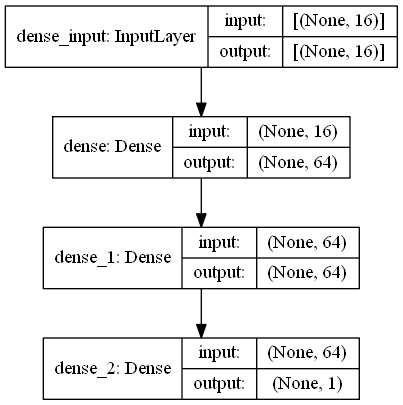

In [18]:
### 1) train test data 나누기 

y = data_cc2.loc[:,"Thickness"]
x = data_cc2.drop(columns="Thickness")

# parameter: test_size=0.2 전체 데이터에서 20%를 test용, 80%를 train 용으로 사용
# parameter: random_state=42 나누는 기준 42값 자체가 큰 의미가 있는게 아니라, 나눌때마다 동일하게 나누기 위한 지정
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 2) ANN structure 만들기 

model_ccl = keras.Sequential([
    # node= 64개, 활성함수= Relu함수
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

### 3) backprobagation을 하기위한 setting
### optimizer: RMS(0.001)은 통상적으로 성능이 좋다고 하기 때문에 사용
### loss= MSE로 update, metrics = 기록을 mae와 mse로 해라
optimizer = tf.keras.optimizers.RMSprop(0.001)
model_ccl.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

### ANN model 시각적으로 확인하기
plot_model(model_ccl, show_shapes=True, show_layer_names=True)

In [19]:
### 4) 데이터 분석하기.
history_ccl = model_ccl.fit(X_train, y_train, epochs=300,verbose=0)
# 분석기록을 dataframe 형태로 만들기
hist_ccl = pd.DataFrame(history_ccl.history)
hist_ccl['epoch'] = history_ccl.epoch

### 5) 성능평가하기
loss_, mae_, mse_ = model_ccl.evaluate(X_test, y_test, verbose=2)
### 6) 예측하기
y_pred = model_ccl.predict(X_test).flatten()

"""
사용자함수: rsq
"""
rsqr_ = rsq(y_pred,y_test)r
rsqr_

6/6 - 0s - loss: 5.9890 - mae: 1.8077 - mse: 5.9890


0.9994192211820593

In [20]:
### 7) 분석결과 그래프로 확인하기


def make_graph(y_test,y_pred):
    """
    y_test: 실제값
    y_pred: 예측값
    """
    # graph 사이즈 결정
    plt.figure(figsize=(12, 7))
    
    ### subplot(2,1,1) = 한번에 (2개의 가로축, 1개의 새로축으로, 총2개의 graph를 표현 # 그 중에서 1번을 표현하겠다.
    plt.subplot(2,1,1)
    # graph 표현할 데이터
    plt.hist(y_test-y_pred, label="y_test")
    # x축 이름
    plt.xlabel("Gap")
    # x축 범위
    plt.xlim([-20,20])
    # graph 이름
    plt.title("Test - Pred")
    
    ### subplot(2,1,1) = 한번에 (2개의 가로축, 1개의 새로축으로, 총2개의 graph를 표현 # 그 중에서 1번을 표현하겠다.
    plt.subplot(2,1,2)
    # graph에 표현할 데이터
    sns.distplot(y_test,hist=False, label="y_test")
    sns.distplot(y_pred,hist=False,  label="y_pred")
    
    # x축 이름
    plt.xlabel("Thickness")
    # graph 이름
    plt.title("Test & Pred")
    # 2개의 praph의 요소들이 겹치지 않게 처리
    plt.tight_layout()
    plt.show()
    
# 향후 버전에서 distplot이 지원되지 않을 수 있다는 경고 메세지가 나올 수 있음

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



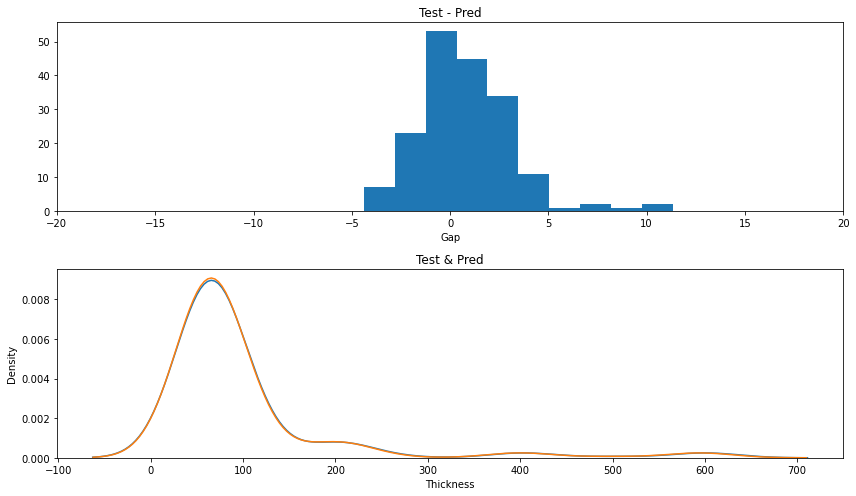

0.9994192211820593

In [21]:
make_graph(y_pred,y_test)
rsqr_

# 2. PP층 분석하기

### 2.1 데이터 불러오기

In [22]:
### 이번에는 pp층만 불러오기
data_pp = data_drop[data_drop["PP"]==1]
data_pp.head()

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,1,1,DS7402M,61.0,46.8,8.37,55,14.29,73,60,66.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,1,DS7402M,47.0,203.4,15.04,56,15.04,46,200,196.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,1,DS7402M,53.0,81.4,15.04,75,15.04,48,90,82.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,7,1,DS7402M,53.0,81.4,14.58,48,14.58,75,90,80.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,9,1,DS7402M,47.0,203.4,15.80,50,15.04,60,200,202.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def linear_reg(i,j,X_train,y_train,X_test,y_test):
    """
    i: Maker이름
    j: Glass이름
    나머지= data
    """
    # 충돌을 막기위해서 module 초기화 하기
    tf.keras.backend.clear_session()
    """
LR_DS7402M_48_8(:원래 46.8이지만, python에서 "."은 다른 의미로 사용되고 있어서, "_"로 변경
    """
    
    ### LR_Maker_Glass 이름으로 된 model 만들기
    globals()['LR_{}_{}'.format(i,str(j).replace(".","_"))] = linear_model.LinearRegression()
    # 모델 학습하기
    globals()['LR_{}_{}'.format(i,str(j).replace(".","_"))].fit(X_train, y_train)
    # 학습한 모델로 값 예측하기
    y_pred = globals()['LR_{}_{}'.format(i,str(j).replace(".","_"))].predict(X_test)
    """
    사용자함수: rsq
    """
    # R_square 값 계산하기
    rsqr_ = rsq(y_pred,y_test)
    # MSE 계산하기
    mse_ = mean_squared_error(y_test, y_pred)
    
    # 기타 기초통계 값 산출하기
    min_ = round(min(abs(y_test - y_pred)),3)
    max_ = round(max(abs(y_test - y_pred)),3)
    mean_ = round((abs(y_test - y_pred)).mean(),3)
    std_ = round(statistics.stdev(y_test - y_pred),3)
    return rsqr_,mse_,y_test,y_pred,[min_,max_,mean_,std_]

In [24]:
def ann_model(i,j,X_train,y_train,X_test,y_test):
    """
    i: Maker이름
    j: Glass이름
    나머지= data
    """
    # 충돌을 막기위해서 module 초기화 하기
    tf.keras.backend.clear_session()
    
    ### ANN_Maker_Glass 이름으로 알고리즘 만들기
    # Basic Structure
    globals()['ANN_{}_{}'.format(i,str(j).replace(".","_"))] = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])
    # Optimizer
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    # Loss function
    globals()['ANN_{}_{}'.format(i,str(j).replace(".","_"))].compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    # 학습하기 (epoch= 300번으로)
    history = globals()['ANN_{}_{}'.format(i,str(j).replace(".","_"))].fit(X_train, y_train, epochs=300,verbose=0)
    
    # 학습결과 dataframe으로 저장하기
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    ### 알고리즘 평가
    # loss, mae, mse 값 도출
    loss_, mae_, mse_ = globals()['ANN_{}_{}'.format(i,str(j).replace(".","_"))].evaluate(X_test, y_test, verbose=2)
    # 값 예측하기
    y_pred = globals()['ANN_{}_{}'.format(i,str(j).replace(".","_"))].predict(X_test).flatten()
    """
    사용자함수: rsq
    """
    rsqr_ = rsq(y_pred,y_test)
    # 기초 통계값
    min_ = round(min(abs(y_test - y_pred)),3)
    max_ = round(max(abs(y_test - y_pred)),3)
    mean_ = round((abs(y_test - y_pred)).mean(),3)
    std_ = round(statistics.stdev(y_test - y_pred),3)
    return rsqr_,mse_,y_test,y_pred,[min_,max_,mean_,std_]    

In [25]:
### 사용자함수: 기본 통계값을 산출해주는 함수
def print_statis(y_pred,y_test):
    rsqr_ = rsq(y_pred,y_test)
    min_ = round(min(abs(y_test - y_pred)),3)
    max_ = round(max(abs(y_test - y_pred)),3)
    mean_ = round((abs(y_test - y_pred)).mean(),3)
    std_ = round(statistics.stdev(y_test - y_pred),3)
    print("R SQR :" , rsqr_)        
    print("Min :" , min_)
    print("Max :" , max_)
    print("Mean : " , mean_)
    print("Std : ", std_)

In [26]:
### 사용자 함수: Linear regression, ANN 같이 돌리는 함수
def anal(data_drop,Drop_col,Graph_show):
    """
    data_drop: 데이터
    Drop_col: 데이터에서 제거해야 하는  columns 목록
    Graph_show: (yes,no) yes면 학습된 결과 graph로 표현
    """
    # Data 에 있는 Maker 목록
    Maker = data_drop['MatlMaker'].unique()
    # Data 에 있는 Glass 목록
    Glass_all = data_drop['MatlG'].unique()
    all_lr_2 = {}
    all_ann_2 = {}

    for i in Maker:
        # data 에서 i Maker만 뽑아오기
        df = data_drop[data_drop['MatlMaker'] == i]
        # 뽑은 데이터에 있는 Glass 종류
        Glass = df['MatlG'].unique()
        for j in Glass:   
            # 해당 Maker의 j의 Glass 만 뽑아내기
            df2 = df[df['MatlG'] == j]
            # input 으로 받은 분석에 필요 없는 columns 제거하기
            df3 = df2.drop(columns=Drop_col)
            # x,y 나누기
            y = df3.loc[:,"Thickness"]
            x = df3.drop(columns="Thickness")
            # train, test 나누기
            X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
            """
            사용자함수: linear_reg (LR 학습)
            """
            rsqr_LR,mse_LR,y_test_LR,y_pred_LR,statis_LR = linear_reg(i,j,X_train,y_train,X_test,y_test)
            """
            사용자함수: ann_model (ANN 학습)
            """
            rsqr_ANN,mse_ANN,y_test_ANN,y_pred_ANN,statis_ANN = ann_model(i,j,X_train,y_train,X_test,y_test)
            
            # 결과값 저장하기
            all_lr_2["LR_{}_{}".format(i,j)]= [rsqr_LR,mse_LR,statis_LR[0],statis_LR[1],statis_LR[2],statis_LR[3]]
            all_ann_2["ANN_{}_{}".format(i,j)]= [rsqr_ANN,mse_ANN,statis_ANN[0],statis_ANN[1],statis_ANN[2],statis_ANN[3]]
            
            if Graph_show=="yes":
                print("#"*50,"{}_{}".format(i,j),"#"*50)
                display(" "*40,"LR"," "*40)
                """
                사용자함수: make_graph
                """
                make_graph(y_test_LR,y_pred_LR)
                """
                사용자함수: print_statis
                """
                print_statis(y_test_LR,y_pred_LR)
                display(" "*40,"ANN"," "*40)
                """
                사용자함수: make_graph
                """
                make_graph(y_test_ANN,y_pred_ANN)
                """
                사용자함수: print_statis
                """
                print_statis(y_test_ANN,y_pred_ANN)
            
                print("-"*120)
            else:
                pass
    # 결과값 저장
    hist_lr_2 = pd.DataFrame(all_lr_2).T
    hist_lr_2 = hist_lr_2.rename(columns={0:"R square",1:"MSE",2:"Min",3:"Max",4:"Mean",5:"Std"})

    hist_ann_2 = pd.DataFrame(all_ann_2).T
    hist_ann_2 = hist_ann_2.rename(columns={0:"R square",1:"MSE",2:"Min",3:"Max",4:"Mean",5:"Std"})
    return hist_lr_2,hist_ann_2

In [27]:
drop_list = ['MatlMaker','MatlG',"Model","PP"]
hist_lr,hist_ann = anal(data_pp,drop_list,"no")

2/2 - 0s - loss: 16.1005 - mae: 2.9575 - mse: 16.1005
2/2 - 0s - loss: 24.8593 - mae: 3.6408 - mse: 24.8593
1/1 - 0s - loss: 13.1666 - mae: 3.3825 - mse: 13.1666
1/1 - 0s - loss: 13.5686 - mae: 2.8873 - mse: 13.5686
2/2 - 0s - loss: 11.0127 - mae: 2.5471 - mse: 11.0127
1/1 - 0s - loss: 10.6768 - mae: 2.7368 - mse: 10.6768
1/1 - 0s - loss: 10.9704 - mae: 2.6677 - mse: 10.9704
1/1 - 0s - loss: 5.8401 - mae: 1.8887 - mse: 5.8401


1/1 - 0s - loss: 10.2442 - mae: 2.3683 - mse: 10.2442
1/1 - 0s - loss: 12.6318 - mae: 3.0982 - mse: 12.6318
1/1 - 0s - loss: 95.9014 - mae: 9.7634 - mse: 95.9014
1/1 - 0s - loss: 28.0118 - mae: 5.2420 - mse: 28.0118
1/1 - 0s - loss: 8.9958 - mae: 2.1314 - mse: 8.9958
1/1 - 0s - loss: 14.5958 - mae: 3.3555 - mse: 14.5958


1/1 - 0s - loss: 5.1145 - mae: 1.8225 - mse: 5.1145
1/1 - 0s - loss: 3.7332 - mae: 1.8612 - mse: 3.7332
1/1 - 0s - loss: 3.7623 - mae: 1.8520 - mse: 3.7623
1/1 - 0s - loss: 1.6991 - mae: 1.2805 - mse: 1.6991
1/1 - 0s - loss: 27.0482 - mae: 4.6188 - mse: 27.0482


1/1 - 0s - loss: 23.3458 - mae: 4.2230 - mse: 23.3458
1/1 - 0s - loss: 2.3660 - mae: 1.4434 - mse: 2.3660
1/1 - 0s - loss: 39.5642 - mae: 6.1514 - mse: 39.5642


# 3. Blind test 돌리기

In [28]:
### 사용자함수 ANN을 통한 test

def ann_test3(testset,drop_list):
    """
    testset: 앞 부분에서 testset으로 뽑아낸 blind test 용 데이터
    drop_list: 분석에 필요없는 columns list
    """
    # pp층은 "matmaker"를 제거해야 함으로 제거 목록 추가
    drop_list_pp = drop_list + ["MatlMaker"]
    drop_list_ccl = drop_list
    
    # model_: pp 층용 데이터, model_2: ccl층 데이터
    model_ = testset.reset_index(drop=True)
    model_2 = make_ccl(model_,drop_list_ccl)
    thick_ = []
    
    ### testset의 한층씩 예측값 산출하기
    for i in range(len(model_)):
        # i 번째 층 불러오기
        target_data = model_.loc[i,:]
        # 해당층의 값들 정리하기
        maker_name = target_data["MatlMaker"]
        glass_name = str((target_data["MatlG"]).replace(".","_"))
        
        full_1 = maker_name +"/"+glass_name
        full =  maker_name +"_"+glass_name
        ### CCL 층 값 예측하기
        if target_data["PP"] == 0:
            test_data = model_2.loc[i,:]
            # y값
            y_t = test_data["Thickness"]
            # x값
            x_t1 = test_data.drop("Thickness")
            x_t = np.array(x_t1).reshape(1, -1).astype('float32')
            # 값예측
            """
            위에서 학습한 CCL 분류기: model_ccl
            """
            prdi_ = model_ccl.predict(x_t)[0][0]
            # 결과저장
            thick_.append((full_1,prdi_,y_t))
            
        else:
            test_data = target_data.drop(drop_list_pp)
            # y값
            y_t = test_data["Thickness"]
            # x 값
            x_t1 = test_data.drop("Thickness")
            x_t = np.array(x_t1).reshape(1, -1).astype('float32')
            # 값예측
            """
            위에서 학습한 ANN 모델 불러오기
            """
            prdi_ = globals() ["ANN_{}".format(full)].predict(x_t)[0][0]
            # 결과 저장
            thick_.append((full_1,prdi_,y_t))

    return thick_

In [51]:
### 사용자함수 LR을 통한 blind test
def lr_test3(testset,drop_list):
    drop_list_pp = drop_list + ["MatlMaker"]
    drop_list_ccl = drop_list
    model_ = testset.reset_index(drop=True)
    model_2 = make_ccl(model_,drop_list_ccl)
    thick_ = []
    for i in range(len(model_)):
        target_data = model_.loc[i,:]
        maker_name = target_data["MatlMaker"]
        glass_name = str((target_data["MatlG"]).replace(".","_"))
        full_1 = maker_name +"/"+glass_name
        full =  maker_name +"_"+glass_name
        
        if target_data["PP"] == 0:
            test_data = model_2.loc[i,:]
            # y값
            y_t = test_data["Thickness"]
            x_t1 = test_data.drop("Thickness")
            x_t = np.array(x_t1).reshape(1, -1).astype('float32')
            
            prdi_ = model_ccl.predict(x_t)[0][0]
            thick_.append((full_1,prdi_,y_t))
            
        else:
            test_data = target_data.drop(drop_list_pp)
            # y값
            y_t = test_data["Thickness"]
            x_t1 = test_data.drop("Thickness")
            x_t = np.array(x_t1).reshape(1, -1).astype('float32')
            
            prdi_ = globals() ["LR_{}".format(full)].predict(x_t)[0]
            thick_.append((full_1,prdi_,y_t))
            
    return thick_

In [46]:
dl = ["Model","PP","MatlG"]

## path_ 저장을 원하는 곳으로 지정 (ann)
path_ = r"C:\Users\1410s\Desktop\professor\1_end\result1"
## model_list 는 1~65 까지 있는 list 
for mo in tqdm(model_list):
    maker_,glass_,pr_,actual_ = [],[],[],[]
    ### 앞에서 testset split 한 데이터 불러오기
    target_ = globals()["model_{}".format(mo)]
    ### Blind test 하기
    blind_test = ann_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
    # 결과값 저장하기
    out_put = pd.DataFrame([maker_,glass_,pr_,actual_]).T.rename(columns={0:"Maker",1:"Glass",2:"pred_",3:"actual"})
    # 결과값 excel로 저장하기
    out_put.to_excel("{}\ANN_model_{}.xlsx".format(path_,mo))

  0%|          | 0/66 [00:00<?, ?it/s]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [39]:
dl = ["Model","PP","MatlG"]

## path_ 저장을 원하는 곳으로 지정 (LR)
path_ = r"C:\Users\1410s\Desktop\professor\1_end\result1"
## model_list 는 1~65 까지 있는 list 
for mo in tqdm(model_list):
    maker_,glass_,pr_,actual_ = [],[],[],[]
    ### 앞에서 testset split 한 데이터 불러오기
    target_ = globals()["model_{}".format(mo)]
    
    ### Blind test 하기
    blind_test = lr_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
    # 결과값 저장하기
    out_put = pd.DataFrame([maker_,glass_,pr_,actual_]).T.rename(columns={0:"Maker",1:"Glass",2:"pred_",3:"actual"})
    # 결과값 excel로 저장하기
    out_put.to_excel("{}\LR_model_{}.xlsx".format(path_,mo))

  0%|          | 0/66 [00:00<?, ?it/s]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# 별첨. Version 2. Sheet 로 저장

In [47]:
dl = ["Model","PP","MatlG"]


path_ = r"C:\Users\1410s\Desktop\professor\1_end\result2\ann2.xlsx"

default_ = pd.DataFrame()
default_.to_excel(path_)
writer = pd.ExcelWriter(path_,engine="xlsxwriter")
## model_list 는 1~65 까지 있는 list 
for mo in tqdm(sorted(model_list)):
    mo_,maker_,glass_,pr_,actual_ = [],[],[],[],[]
    ### 앞에서 testset split 한 데이터 불러오기
    target_ = globals()["model_{}".format(mo)]
    ### Blind test 하기
    blind_test = ann_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
        mo_.append(mo)
    # 결과값 저장하기
    out_put = pd.DataFrame([mo_,maker_,glass_,pr_,actual_]).T.rename(columns={0:"Model",1:"Maker",2:"Glass",3:"pred_",4:"actual"})
    # 결과값 excel로 저장하기
    out_put.to_excel(writer,sheet_name="model_{}".format(mo))
writer.save()
writer.close()

  0%|          | 0/66 [00:00<?, ?it/s]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [41]:
dl = ["Model","PP","MatlG"]

path_ = r"C:\Users\Samsung\jupyter\Project_PCB\result\0214\version_2\LR_all.xlsx"

default_ = pd.DataFrame()
default_.to_excel(path_)
writer = pd.ExcelWriter(path_,engine="xlsxwriter")
## model_list 는 1~65 까지 있는 list 
for mo in tqdm(sorted(model_list)):
    mo_,maker_,glass_,pr_,actual_ = [],[],[],[],[]
    ### 앞에서 testset split 한 데이터 불러오기
    target_ = globals()["model_{}".format(mo)]
    ### Blind test 하기
    blind_test = lr_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
        mo_.append(mo)
    # 결과값 저장하기
    out_put = pd.DataFrame([mo_,maker_,glass_,pr_,actual_]).T.rename(columns={0:"Model",1:"Maker",2:"Glass",3:"pred_",4:"actual"})
    # 결과값 excel로 저장하기
    out_put.to_excel(writer,sheet_name="model_{}".format(mo))
writer.save()
writer.close()

  0%|          | 0/65 [00:00<?, ?it/s]

# 별첨 Version 3. 하나에 저장

In [52]:
dl = ["Model","PP","MatlG"]


path_ = r"C:\Users\1410s\Desktop\professor\1_end\result3.xlsx"
default_ = pd.DataFrame()


for mo in tqdm(sorted(model_list)):
    mo_,maker_,glass_,pr_,actual_ = [],[],[],[],[]

    target_ = globals()["model_{}".format(mo)]

    blind_test = ann_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
        mo_.append(mo)

    out_put = pd.DataFrame([mo_,maker_,glass_,pr_,actual_]).T.rename(columns={0:"Model",1:"Maker",2:"Glass",3:"pred_",4:"actual"})
    default_ = pd.concat([default_,out_put])
default_ = default_.reset_index(drop=True)
default_.to_excel(path_)

  0%|          | 0/66 [00:00<?, ?it/s]

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [48]:
dl = ["Model","PP","MatlG"]


path_ = r"C:\Users\Samsung\jupyter\Project_PCB\result\0214\version_3\LR_all.xlsx"
default_ = pd.DataFrame()


for mo in tqdm(sorted(model_list)):
    mo_,maker_,glass_,pr_,actual_ = [],[],[],[],[]

    target_ = globals()["model_{}".format(mo)]

    blind_test = lr_test3(target_,dl)
    for i in blind_test:
        maker,glass = i[0].split("/")
        maker_.append(maker)
        glass_.append(glass.replace("_","."))
        pr_.append(i[1])
        actual_.append(i[2])
        mo_.append(mo)

    out_put = pd.DataFrame([mo_,maker_,glass_,pr_,actual_]).T.rename(columns={0:"Model",1:"Maker",2:"Glass",3:"pred_",4:"actual"})
    default_ = pd.concat([default_,out_put])
default_ = default_.reset_index(drop=True)
default_.to_excel(path_)

  0%|          | 0/65 [00:00<?, ?it/s]